<a href="https://colab.research.google.com/github/Rafael-JP/Ejemplos-de-clase/blob/main/Monte_Carlo_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple calculation of Pi using direct Monte Carlo**

The algorithm is an implementation of Algorithm 1.1 from the book by W Krauth "Statistical Mechanics Algorithms and Computations".

This is a classical example of a direct sampling Monte Carlo calculation


Enter number of points for Monte Carlo to estimate the area of a sphere?
>100

--------------

Result

Number of points inside cube of volume 8: 100
Number of points inside unit sphere: 49
Ratio unit sphere/full cube= 49.0 % 

Estimated Area of unit sphere = 0.49 x 8 = 3.92
Exact value (sphere): 4.1887902047863905


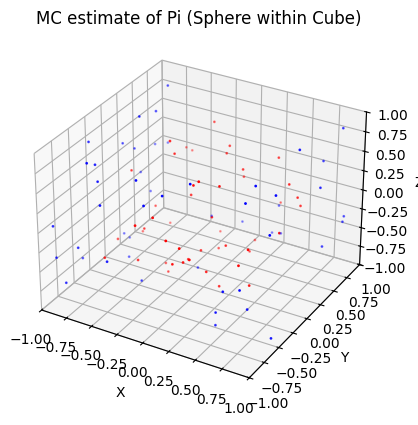

In [50]:
# Here we import the mathematical library and the plots library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d # import art3d

# input total number of random points
total_random_points = int(input("\nEnter number of points for Monte Carlo to estimate the area of a sphere?\n>"))

# Init counter of number of points inside unit circle and inside unit square
inside_sphere = 0
inside_cube = 0

#Create list to save x,y of points inside circle to be shown in the graph
xc = []
yc = []
zc = []

#Create list to save x,y of points inside square but outside circle to be shown in the graph
xs = []
ys = []
zs = []
#---------------------------------------------------
#Calculation

while (inside_cube<total_random_points):

    #generate a random point
    x = np.random.uniform(-1.0, 1.0)
    y = np.random.uniform(-1.0, 1.0)
    z = np.random.uniform(-1.0, 1.0)

    #Update number of points inside square
    inside_cube = inside_cube +1

    #check whether it is inside circle (count and save for representation)
    if x**2 + y**2 + z**2 <= 1.0:
        inside_sphere = inside_sphere +1
        xc.append(x)
        yc.append(y)
        zc.append(z)
    else:
        xs.append(x)
        ys.append(y)
        zs.append(z)

#---------------------------------------------------

# Statistics

# Number of points inside circle as compared with total
sphere_ratio = inside_sphere /  inside_cube

#Number of points inside circle as compared with those inside the total square with area 4.0
volume_approx = 8*sphere_ratio

# Print output
print('\n--------------')
print('\nResult')
print('\nNumber of points inside cube of volume 8:', inside_cube)
print('Number of points inside unit sphere:',inside_sphere,)
print('Ratio unit sphere/full cube=',sphere_ratio*100,'% \n')
print('Estimated Area of unit sphere =',sphere_ratio,'x 8 =', volume_approx)
print('Exact value (sphere):', 4/3*np.pi)

#Plot

# Plot (modified for 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot points inside the sphere in red
ax.scatter(xc, yc, zc, c='r', marker='o', s=1.0)

# Plot points outside the sphere in blue
ax.scatter(xs, ys, zs, c='b', marker='o', s=1.0)

# Set plot title
ax.set_title('MC estimate of Pi (Sphere within Cube)')

# Set axis labels (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create the sphere data points using numpy
# Generate meshgrid for sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere surface (Si se quiere una esfera)
#ax.plot_surface(x, y, z, color='green', linewidth=0, alpha=0.5) # using plot_surface to represent sphere

# Set axis limits
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))

# Show the plot
plt.show()

1800 4.08

